In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(pd.read_csv("data/gemstone.csv"))

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns= ['id'], inplace= True)

Seggregate the dataset into numerical and categorical datatypes

In [12]:
numerical_columns = df.columns[df.dtypes != "object"]
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
numerical_columns.dtype

dtype('O')

In [14]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [15]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

Inferences :

* The dataset has both numerical and categorical variables.
* The dataset is long and not wide - good for computation
* There are no null values in the dataset 

In [16]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [17]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

Visualization for Numerical Data Types

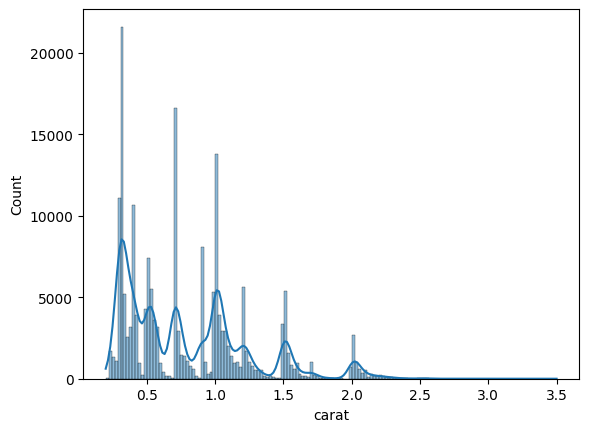

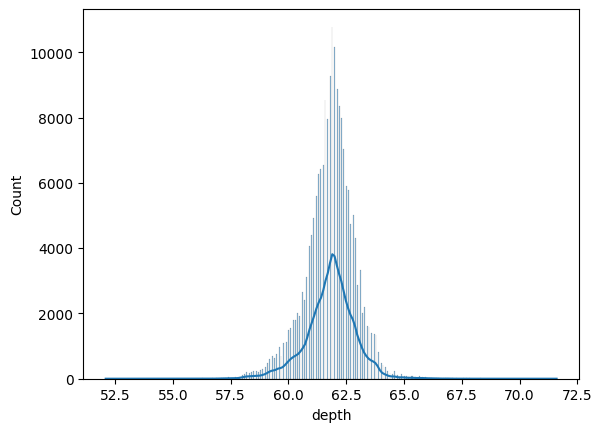

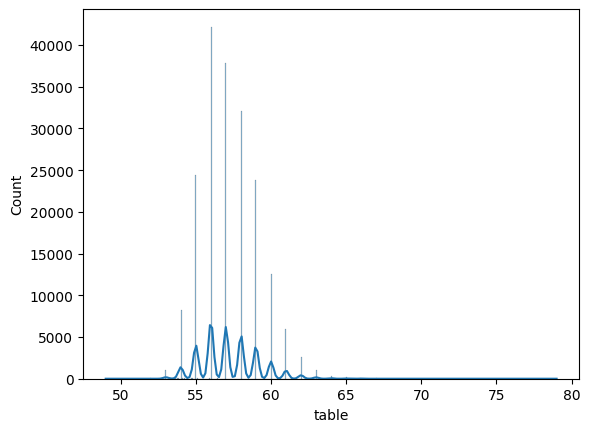

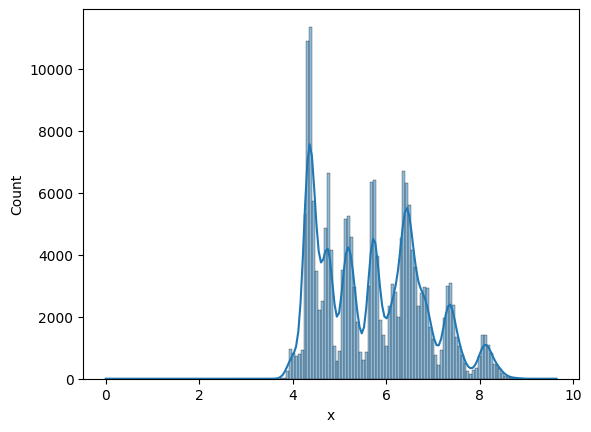

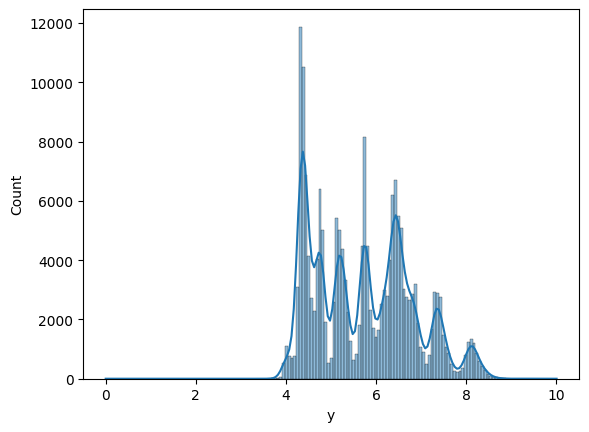

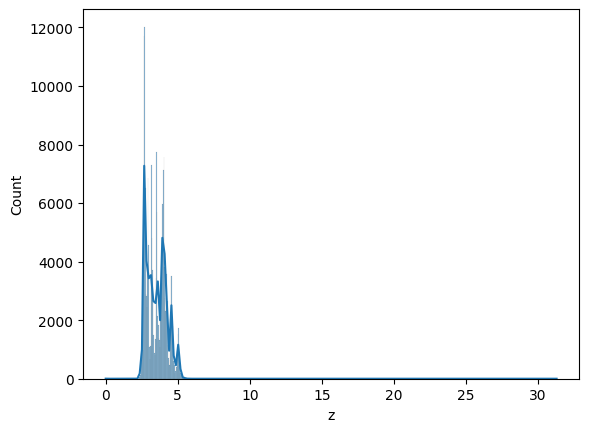

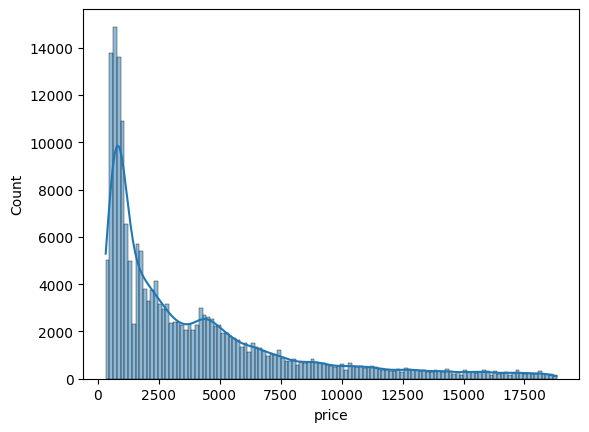

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

x = 1
for i in numerical_columns:
    sns.histplot(data = df, x=i, kde = True)
    print("\n") 
    plt.show()


In [19]:
df["price"].value_counts()

price
544      542
605      464
789      454
828      438
776      437
        ... 
3807       1
4621       1
11165      1
9609       1
12094      1
Name: count, Length: 8738, dtype: int64

Visualization for Categorical Data Types

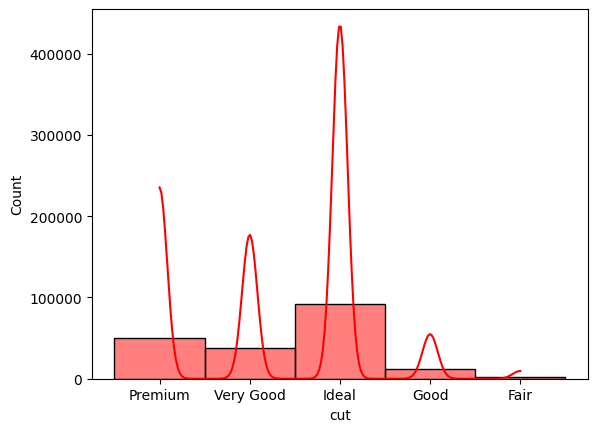

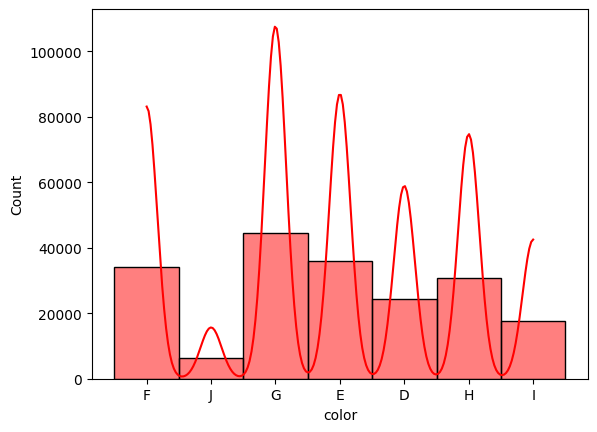

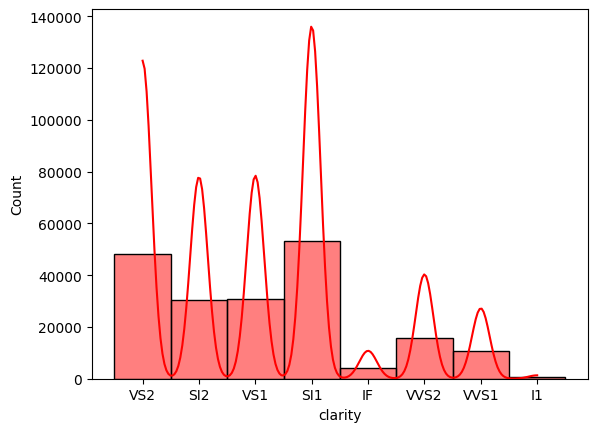

In [20]:
x = 1
for i in categorical_columns:
    sns.histplot(data = df, x=i, kde = True, color= "red")
    print("\n") 
    plt.show()

Significant part: To Check correlations between numerical columns

In [21]:
df[numerical_columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

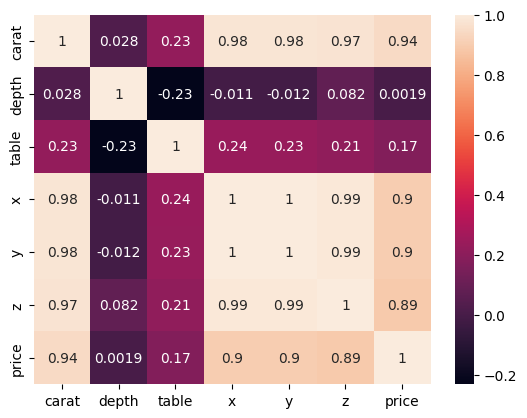

In [22]:
sns.heatmap(df[numerical_columns].corr(), annot=True)